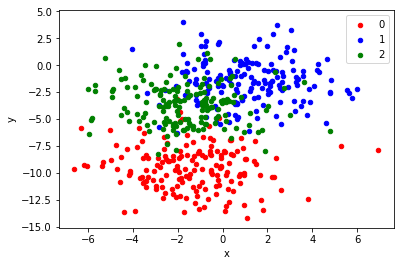

In [2]:
# scatter plot of blobs dataset
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=2, random_state=2)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

Using TensorFlow backend.


Train: 0.867, Test: 0.780


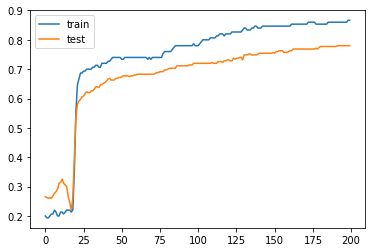

In [3]:
# fit high variance mlp on blobs classification problem
from sklearn.datasets.samples_generator import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=2, random_state=2)
y = to_categorical(y)
# split into train and test
n_train = int(0.3 * X.shape[0])
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(15, input_dim=2, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# learning curves of model accuracy
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

> 0.771
> 0.780
> 0.737
> 0.760
> 0.743
> 0.729
> 0.751
> 0.791
> 0.797
> 0.763
> 0.789
> 0.766
> 0.749
> 0.737
> 0.803
> 0.737
> 0.757
> 0.757
> 0.763
> 0.757
> 0.720
> 0.754
> 0.763
> 0.774
> 0.789
> 0.777
> 0.743
> 0.760
> 0.783
> 0.729
Scores Mean: 0.761, Standard Deviation: 0.021


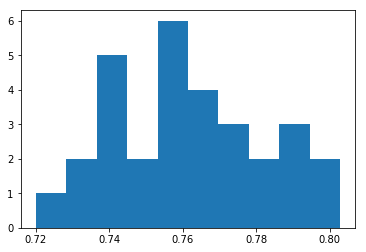

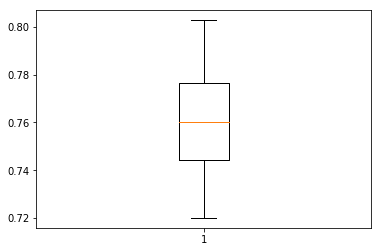

In [4]:
# demonstrate high variance of mlp model on blobs classification problem
from sklearn.datasets.samples_generator import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from numpy import mean
from numpy import std
from matplotlib import pyplot

# fit and evaluate a neural net model on the dataset
def evaluate_model(trainX, trainy, testX, testy):
    # define model
    model = Sequential()
    model.add(Dense(15, input_dim=2, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit model
    model.fit(trainX, trainy, epochs=200, verbose=0)
    # evaluate the model
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    return test_acc

# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=2, random_state=2)
y = to_categorical(y)
# split into train and test
n_train = int(0.3 * X.shape[0])
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# repeated evaluation
n_repeats = 30
scores = list()
for _ in range(n_repeats):
    score = evaluate_model(trainX, trainy, testX, testy)
    print('> %.3f' % score)
    scores.append(score)
# summarize the distribution of scores
print('Scores Mean: %.3f, Standard Deviation: %.3f' % (mean(scores), std(scores)))
# histogram of distribution
pyplot.hist(scores, bins=10)
pyplot.show()
# boxplot of distribution
pyplot.boxplot(scores)
pyplot.show()

1
> 0.763
2
> 0.751
3
> 0.763
4
> 0.766
5
> 0.769
6
> 0.769
7
> 0.769
8
> 0.771
9
> 0.771
10
> 0.769
11
> 0.771
12
> 0.771
13
> 0.771
14
> 0.771
15
> 0.769
16
> 0.766
17
> 0.771
18
> 0.771
19
> 0.771
20
> 0.771


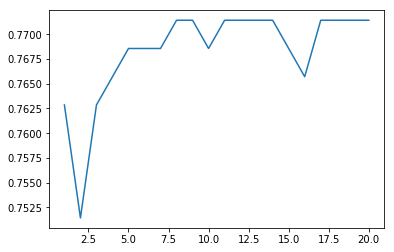

In [5]:
# model averaging ensemble and a study of ensemble size on test accuracy
from sklearn.datasets.samples_generator import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
import numpy
from numpy import array
from numpy import argmax
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

# fit model on dataset
def fit_model(trainX, trainy):
    # define model
    model = Sequential()
    model.add(Dense(15, input_dim=2, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit model
    model.fit(trainX, trainy, epochs=200, verbose=0)
    return model

# make an ensemble prediction for multi-class classification
def ensemble_predictions(members, testX):
    # make predictions
    yhats = [model.predict(testX) for model in members]
    yhats = array(yhats)
    # sum across ensemble members
    summed = numpy.sum(yhats, axis=0)
    # argmax across classes
    result = argmax(summed, axis=1)
    return result

# evaluate a specific number of members in an ensemble
def evaluate_n_members(members, n_members, testX, testy):
    # select a subset of members
    subset = members[:n_members]
    print(len(subset))
    # make prediction
    yhat = ensemble_predictions(subset, testX)
    # calculate accuracy
    return accuracy_score(testy, yhat)

# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=2, random_state=2)
# split into train and test
n_train = int(0.3 * X.shape[0])
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
trainy = to_categorical(trainy)
# fit all models
n_members = 20
members = [fit_model(trainX, trainy) for _ in range(n_members)]
# evaluate different numbers of ensembles
scores = list()
for i in range(1, n_members+1):
    score = evaluate_n_members(members, i, testX, testy)
    print('> %.3f' % score)
    scores.append(score)
# plot score vs number of ensemble members
x_axis = [i for i in range(1, n_members+1)]
pyplot.plot(x_axis, scores)
pyplot.show()

In [6]:
# repeated evaluation of model averaging ensemble on blobs dataset
from sklearn.datasets.samples_generator import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
import numpy
from numpy import array
from numpy import argmax
from numpy import mean
from numpy import std
from sklearn.metrics import accuracy_score

# fit model on dataset
def fit_model(trainX, trainy):
    # define model
    model = Sequential()
    model.add(Dense(15, input_dim=2, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit model
    model.fit(trainX, trainy, epochs=200, verbose=0)
    return model

# make an ensemble prediction for multi-class classification
def ensemble_predictions(members, testX):
    # make predictions
    yhats = [model.predict(testX) for model in members]
    yhats = array(yhats)
    # sum across ensemble members
    summed = numpy.sum(yhats, axis=0)
    # argmax across classes
    result = argmax(summed, axis=1)
    return result

# evaluate ensemble model
def evaluate_members(members, testX, testy):
    # make prediction
    yhat = ensemble_predictions(members, testX)
    # calculate accuracy
    return accuracy_score(testy, yhat)

# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=2, random_state=2)
# split into train and test
n_train = int(0.3 * X.shape[0])
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
trainy = to_categorical(trainy)
# repeated evaluation
n_repeats = 30
n_members = 8
scores = list()
for _ in range(n_repeats):
    # fit all models
    members = [fit_model(trainX, trainy) for _ in range(n_members)]
    # evaluate ensemble
    score = evaluate_members(members, testX, testy)
    print('> %.3f' % score)
    scores.append(score)
# summarize the distribution of scores
print('Scores Mean: %.3f, Standard Deviation: %.3f' % (mean(scores), std(scores)))

> 0.771
> 0.763
> 0.766
> 0.771
> 0.769
> 0.769
> 0.766
> 0.766
> 0.780
> 0.769
> 0.766
> 0.771
> 0.769
> 0.771
> 0.769
> 0.769
> 0.774
> 0.769
> 0.769
> 0.766
> 0.769
> 0.769
> 0.769
> 0.769
> 0.774
> 0.769
> 0.771
> 0.763
> 0.771
> 0.771
Scores Mean: 0.769, Standard Deviation: 0.003


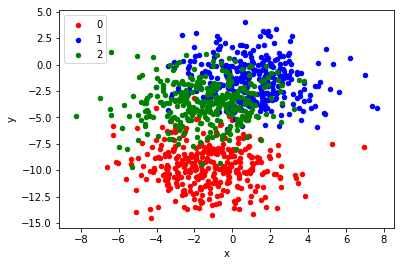

In [7]:
# scatter plot of blobs dataset
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

Train: 0.830, Test: 0.860


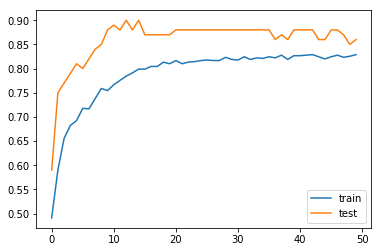

In [8]:
# develop an mlp for blobs dataset
from sklearn.datasets.samples_generator import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = int(0.9 * X.shape[0])
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=50, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# learning curves of model accuracy
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

>0.838
>0.838
>0.826
>0.846
>0.844
>0.828
>0.854
>0.842
>0.796
>0.832
Estimated Accuracy 0.834 (0.015)
> 1: single=0.820, ensemble=0.820
> 2: single=0.819, ensemble=0.820
> 3: single=0.820, ensemble=0.820
> 4: single=0.820, ensemble=0.820
> 5: single=0.819, ensemble=0.821
> 6: single=0.820, ensemble=0.821
> 7: single=0.820, ensemble=0.821
> 8: single=0.820, ensemble=0.820
> 9: single=0.820, ensemble=0.820
> 10: single=0.821, ensemble=0.820
Accuracy 0.820 (0.000)


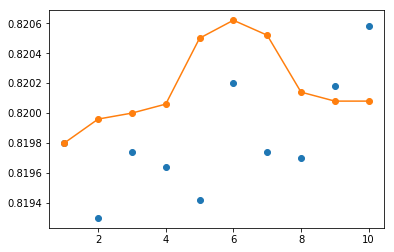

In [9]:
# random-splits mlp ensemble on blobs dataset
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
from numpy import mean
from numpy import std
import numpy
from numpy import array
from numpy import argmax

# evaluate a single mlp model
def evaluate_model(trainX, trainy, testX, testy):
    # encode targets
    trainy_enc = to_categorical(trainy)
    testy_enc = to_categorical(testy)
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit model
    model.fit(trainX, trainy_enc, epochs=50, verbose=0)
    # evaluate the model
    _, test_acc = model.evaluate(testX, testy_enc, verbose=0)
    return model, test_acc

# make an ensemble prediction for multi-class classification
def ensemble_predictions(members, testX):
    # make predictions
    yhats = [model.predict(testX) for model in members]
    yhats = array(yhats)
    # sum across ensemble members
    summed = numpy.sum(yhats, axis=0)
    # argmax across classes
    result = argmax(summed, axis=1)
    return result

# evaluate a specific number of members in an ensemble
def evaluate_n_members(members, n_members, testX, testy):
    # select a subset of members
    subset = members[:n_members]
    # make prediction
    yhat = ensemble_predictions(subset, testX)
    # calculate accuracy
    return accuracy_score(testy, yhat)

# generate 2d classification dataset
dataX, datay = make_blobs(n_samples=55000, centers=3, n_features=2, cluster_std=2, random_state=2)
X, newX = dataX[:5000, :], dataX[5000:, :]
y, newy = datay[:5000], datay[5000:]
# multiple train-test splits
n_splits = 10
scores, members = list(), list()
for _ in range(n_splits):
    # split data
    trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.10)
    # evaluate model
    model, test_acc = evaluate_model(trainX, trainy, testX, testy)
    print('>%.3f' % test_acc)
    scores.append(test_acc)
    members.append(model)
# summarize expected performance
print('Estimated Accuracy %.3f (%.3f)' % (mean(scores), std(scores)))
# evaluate different numbers of ensembles on hold out set
single_scores, ensemble_scores = list(), list()
for i in range(1, n_splits+1):
    ensemble_score = evaluate_n_members(members, i, newX, newy)
    newy_enc = to_categorical(newy)
    _, single_score = members[i-1].evaluate(newX, newy_enc, verbose=0)
    print('> %d: single=%.3f, ensemble=%.3f' % (i, single_score, ensemble_score))
    ensemble_scores.append(ensemble_score)
    single_scores.append(single_score)
# plot score vs number of ensemble members
print('Accuracy %.3f (%.3f)' % (mean(single_scores), std(single_scores)))
x_axis = [i for i in range(1, n_splits+1)]
pyplot.plot(x_axis, single_scores, marker='o', linestyle='None')
pyplot.plot(x_axis, ensemble_scores, marker='o')
pyplot.show()

>0.830
>0.868
>0.822
>0.812
>0.828
>0.818
>0.810
>0.840
>0.826
>0.816
Estimated Accuracy 0.827 (0.016)
> 1: single=0.820, ensemble=0.820
> 2: single=0.820, ensemble=0.820
> 3: single=0.820, ensemble=0.820
> 4: single=0.820, ensemble=0.820
> 5: single=0.819, ensemble=0.821
> 6: single=0.818, ensemble=0.820
> 7: single=0.819, ensemble=0.820
> 8: single=0.821, ensemble=0.820
> 9: single=0.820, ensemble=0.820
> 10: single=0.820, ensemble=0.820
Accuracy 0.820 (0.001)


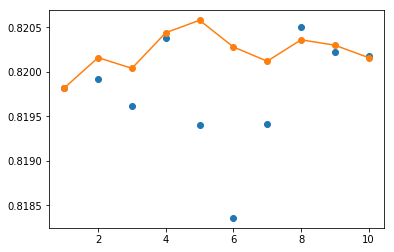

In [10]:
# cross-validation mlp ensemble on blobs dataset
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
from numpy import mean
from numpy import std
import numpy
from numpy import array
from numpy import argmax

# evaluate a single mlp model
def evaluate_model(trainX, trainy, testX, testy):
    # encode targets
    trainy_enc = to_categorical(trainy)
    testy_enc = to_categorical(testy)
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit model
    model.fit(trainX, trainy_enc, epochs=50, verbose=0)
    # evaluate the model
    _, test_acc = model.evaluate(testX, testy_enc, verbose=0)
    return model, test_acc

# make an ensemble prediction for multi-class classification
def ensemble_predictions(members, testX):
    # make predictions
    yhats = [model.predict(testX) for model in members]
    yhats = array(yhats)
    # sum across ensemble members
    summed = numpy.sum(yhats, axis=0)
    # argmax across classes
    result = argmax(summed, axis=1)
    return result

# evaluate a specific number of members in an ensemble
def evaluate_n_members(members, n_members, testX, testy):
    # select a subset of members
    subset = members[:n_members]
    # make prediction
    yhat = ensemble_predictions(subset, testX)
    # calculate accuracy
    return accuracy_score(testy, yhat)

# generate 2d classification dataset
dataX, datay = make_blobs(n_samples=55000, centers=3, n_features=2, cluster_std=2, random_state=2)
X, newX = dataX[:5000, :], dataX[5000:, :]
y, newy = datay[:5000], datay[5000:]
# prepare the k-fold cross-validation configuration
n_folds = 10
kfold = KFold(n_folds, True, 1)
# cross validation estimation of performance
scores, members = list(), list()
for train_ix, test_ix in kfold.split(X):
    # select samples
    trainX, trainy = X[train_ix], y[train_ix]
    testX, testy = X[test_ix], y[test_ix]
    # evaluate model
    model, test_acc = evaluate_model(trainX, trainy, testX, testy)
    print('>%.3f' % test_acc)
    scores.append(test_acc)
    members.append(model)
# summarize expected performance
print('Estimated Accuracy %.3f (%.3f)' % (mean(scores), std(scores)))
# evaluate different numbers of ensembles on hold out set
single_scores, ensemble_scores = list(), list()
for i in range(1, n_folds+1):
    ensemble_score = evaluate_n_members(members, i, newX, newy)
    newy_enc = to_categorical(newy)
    _, single_score = members[i-1].evaluate(newX, newy_enc, verbose=0)
    print('> %d: single=%.3f, ensemble=%.3f' % (i, single_score, ensemble_score))
    ensemble_scores.append(ensemble_score)
    single_scores.append(single_score)
# plot score vs number of ensemble members
print('Accuracy %.3f (%.3f)' % (mean(single_scores), std(single_scores)))
x_axis = [i for i in range(1, n_folds+1)]
pyplot.plot(x_axis, single_scores, marker='o', linestyle='None')
pyplot.plot(x_axis, ensemble_scores, marker='o')
pyplot.show()

>0.816
>0.836
>0.829
>0.825
>0.818
>0.834
>0.823
>0.839
>0.823
>0.830
Estimated Accuracy 0.827 (0.007)
> 1: single=0.819, ensemble=0.819
> 2: single=0.820, ensemble=0.819
> 3: single=0.820, ensemble=0.819
> 4: single=0.821, ensemble=0.820
> 5: single=0.818, ensemble=0.820
> 6: single=0.821, ensemble=0.820
> 7: single=0.820, ensemble=0.820
> 8: single=0.820, ensemble=0.820
> 9: single=0.818, ensemble=0.820
> 10: single=0.820, ensemble=0.820
Accuracy 0.819 (0.001)


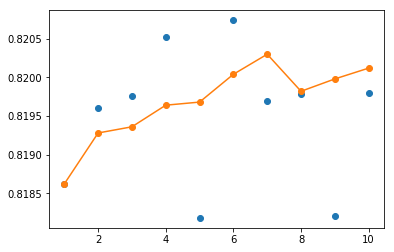

In [11]:
# bagging mlp ensemble on blobs dataset
from sklearn.datasets.samples_generator import make_blobs
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
from numpy import mean
from numpy import std
import numpy
from numpy import array
from numpy import argmax

# evaluate a single mlp model
def evaluate_model(trainX, trainy, testX, testy):
    # encode targets
    trainy_enc = to_categorical(trainy)
    testy_enc = to_categorical(testy)
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit model
    model.fit(trainX, trainy_enc, epochs=50, verbose=0)
    # evaluate the model
    _, test_acc = model.evaluate(testX, testy_enc, verbose=0)
    return model, test_acc

# make an ensemble prediction for multi-class classification
def ensemble_predictions(members, testX):
    # make predictions
    yhats = [model.predict(testX) for model in members]
    yhats = array(yhats)
    # sum across ensemble members
    summed = numpy.sum(yhats, axis=0)
    # argmax across classes
    result = argmax(summed, axis=1)
    return result

# evaluate a specific number of members in an ensemble
def evaluate_n_members(members, n_members, testX, testy):
    # select a subset of members
    subset = members[:n_members]
    # make prediction
    yhat = ensemble_predictions(subset, testX)
    # calculate accuracy
    return accuracy_score(testy, yhat)

# generate 2d classification dataset
dataX, datay = make_blobs(n_samples=55000, centers=3, n_features=2, cluster_std=2, random_state=2)
X, newX = dataX[:5000, :], dataX[5000:, :]
y, newy = datay[:5000], datay[5000:]
# multiple train-test splits
n_splits = 10
scores, members = list(), list()
for _ in range(n_splits):
    # select indexes
    ix = [i for i in range(len(X))]
    train_ix = resample(ix, replace=True, n_samples=4500)
    test_ix = [x for x in ix if x not in train_ix]
    # select data
    trainX, trainy = X[train_ix], y[train_ix]
    testX, testy = X[test_ix], y[test_ix]
    # evaluate model
    model, test_acc = evaluate_model(trainX, trainy, testX, testy)
    print('>%.3f' % test_acc)
    scores.append(test_acc)
    members.append(model)
# summarize expected performance
print('Estimated Accuracy %.3f (%.3f)' % (mean(scores), std(scores)))
# evaluate different numbers of ensembles on hold out set
single_scores, ensemble_scores = list(), list()
for i in range(1, n_splits+1):
    ensemble_score = evaluate_n_members(members, i, newX, newy)
    newy_enc = to_categorical(newy)
    _, single_score = members[i-1].evaluate(newX, newy_enc, verbose=0)
    print('> %d: single=%.3f, ensemble=%.3f' % (i, single_score, ensemble_score))
    ensemble_scores.append(ensemble_score)
    single_scores.append(single_score)
# plot score vs number of ensemble members
print('Accuracy %.3f (%.3f)' % (mean(single_scores), std(single_scores)))
x_axis = [i for i in range(1, n_splits+1)]
pyplot.plot(x_axis, single_scores, marker='o', linestyle='None')
pyplot.plot(x_axis, ensemble_scores, marker='o')
pyplot.show()

In [1]:
# develop an mlp for blobs dataset
from sklearn.datasets.samples_generator import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_blobs(n_samples=1100, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 100
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
print(trainX.shape, testX.shape)
# define model
model = Sequential()
model.add(Dense(25, input_dim=2, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=1000, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Using TensorFlow backend.


(100, 2) (1000, 2)
Train: 0.870, Test: 0.816


<Figure size 640x480 with 1 Axes>

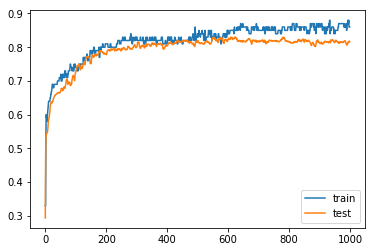

In [2]:
# learning curves of model accuracy
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

In [3]:
# save horizontal voting ensemble members during training
from sklearn.datasets.samples_generator import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
from os import makedirs
# generate 2d classification dataset
X, y = make_blobs(n_samples=1100, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 100
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
print(trainX.shape, testX.shape)
# define model
model = Sequential()
model.add(Dense(25, input_dim=2, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# create directory for models
makedirs('models')
# fit model
n_epochs, n_save_after = 1000, 950
for i in range(n_epochs):
    # fit model for a single epoch
    model.fit(trainX, trainy, epochs=1, verbose=0)
    # check if we should save the model
    if i >= n_save_after:
        model.save('models/model_' + str(i) + '.h5')

(100, 2) (1000, 2)


(100, 2) (1000, 2)
>loaded models/model_950.h5
>loaded models/model_951.h5
>loaded models/model_952.h5
>loaded models/model_953.h5
>loaded models/model_954.h5
>loaded models/model_955.h5
>loaded models/model_956.h5
>loaded models/model_957.h5
>loaded models/model_958.h5
>loaded models/model_959.h5
>loaded models/model_960.h5
>loaded models/model_961.h5
>loaded models/model_962.h5
>loaded models/model_963.h5
>loaded models/model_964.h5
>loaded models/model_965.h5
>loaded models/model_966.h5
>loaded models/model_967.h5
>loaded models/model_968.h5
>loaded models/model_969.h5
>loaded models/model_970.h5
>loaded models/model_971.h5
>loaded models/model_972.h5
>loaded models/model_973.h5
>loaded models/model_974.h5
>loaded models/model_975.h5
>loaded models/model_976.h5
>loaded models/model_977.h5
>loaded models/model_978.h5
>loaded models/model_979.h5
>loaded models/model_980.h5
>loaded models/model_981.h5
>loaded models/model_982.h5
>loaded models/model_983.h5
>loaded models/model_984.h5
>

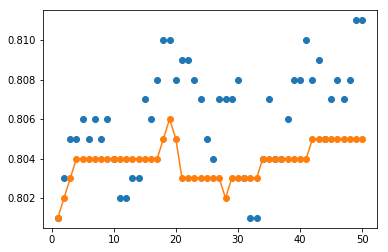

In [4]:
# load models and make predictions using a horizontal voting ensemble
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
from numpy import mean
from numpy import std
import numpy
from numpy import array
from numpy import argmax

# load models from file
def load_all_models(n_start, n_end):
    all_models = list()
    for epoch in range(n_start, n_end):
        # define filename for this ensemble
        filename = 'models/model_' + str(epoch) + '.h5'
        # load model from file
        model = load_model(filename)
        # add to list of members
        all_models.append(model)
        print('>loaded %s' % filename)
    return all_models

# make an ensemble prediction for multi-class classification
def ensemble_predictions(members, testX):
    # make predictions
    yhats = [model.predict(testX) for model in members]
    yhats = array(yhats)
    # sum across ensemble members
    summed = numpy.sum(yhats, axis=0)
    # argmax across classes
    result = argmax(summed, axis=1)
    return result

# evaluate a specific number of members in an ensemble
def evaluate_n_members(members, n_members, testX, testy):
    # select a subset of members
    subset = members[:n_members]
    # make prediction
    yhat = ensemble_predictions(subset, testX)
    # calculate accuracy
    return accuracy_score(testy, yhat)

# generate 2d classification dataset
X, y = make_blobs(n_samples=1100, centers=3, n_features=2, cluster_std=2, random_state=2)
# split into train and test
n_train = 100
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
print(trainX.shape, testX.shape)
# load models in order
members = load_all_models(950, 1000)
print('Loaded %d models' % len(members))
# reverse loaded models so we build the ensemble with the last models first
members = list(reversed(members))
# evaluate different numbers of ensembles on hold out set
single_scores, ensemble_scores = list(), list()
for i in range(1, len(members)+1):
    # evaluate model with i members
    ensemble_score = evaluate_n_members(members, i, testX, testy)
    # evaluate the i'th model standalone
    testy_enc = to_categorical(testy)
    _, single_score = members[i-1].evaluate(testX, testy_enc, verbose=0)
    # summarize this step
    print('> %d: single=%.3f, ensemble=%.3f' % (i, single_score, ensemble_score))
    ensemble_scores.append(ensemble_score)
    single_scores.append(single_score)
# summarize average accuracy of a single final model
print('Accuracy %.3f (%.3f)' % (mean(single_scores), std(single_scores)))
# plot score vs number of ensemble members
x_axis = [i for i in range(1, len(members)+1)]
pyplot.plot(x_axis, single_scores, marker='o', linestyle='None')
pyplot.plot(x_axis, ensemble_scores, marker='o')
pyplot.show()

In [5]:
# grid search for coefficients in a weighted average ensemble for the blobs problem
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
from numpy import mean
from numpy import std
from numpy import array
from numpy import argmax
from numpy import tensordot
from numpy.linalg import norm
from itertools import product

# fit model on dataset
def fit_model(trainX, trainy):
    trainy_enc = to_categorical(trainy)
    # define model
    model = Sequential()
    model.add(Dense(25, input_dim=2, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit model
    model.fit(trainX, trainy_enc, epochs=500, verbose=0)
    return model

# make an ensemble prediction for multi-class classification
def ensemble_predictions(members, weights, testX):
    # make predictions
    yhats = [model.predict(testX) for model in members]
    yhats = array(yhats)
    # weighted sum across ensemble members
    summed = tensordot(yhats, weights, axes=((0),(0)))
    # argmax across classes
    result = argmax(summed, axis=1)
    return result

# evaluate a specific number of members in an ensemble
def evaluate_ensemble(members, weights, testX, testy):
    # make prediction
    yhat = ensemble_predictions(members, weights, testX)
    # calculate accuracy
    return accuracy_score(testy, yhat)

# normalize a vector to have unit norm
def normalize(weights):
    # calculate l1 vector norm
    result = norm(weights, 1)
    # check for a vector of all zeros
    if result == 0.0:
        return weights
    # return normalized vector (unit norm)
    return weights / result

# grid search weights
def grid_search(members, testX, testy):
    # define weights to consider
    w = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    best_score, best_weights = 0.0, None
    # iterate all possible combinations (cartesian product)
    for weights in product(w, repeat=len(members)):
        # skip if all weights are equal
        if len(set(weights)) == 1:
            continue
        # hack, normalize weight vector
        weights = normalize(weights)
        # evaluate weights
        score = evaluate_ensemble(members, weights, testX, testy)
        if score > best_score:
            best_score, best_weights = score, weights
            print('>%s %.3f' % (best_weights, best_score))
    return list(best_weights)

# generate 2d classification dataset
X, y = make_blobs(n_samples=1100, centers=3, n_features=2, cluster_std=2, random_state=2)
# split into train and test
n_train = 100
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
print(trainX.shape, testX.shape)
# fit all models
n_members = 5
members = [fit_model(trainX, trainy) for _ in range(n_members)]
# evaluate each single model on the test set
testy_enc = to_categorical(testy)
for i in range(n_members):
    _, test_acc = members[i].evaluate(testX, testy_enc, verbose=0)
    print('Model %d: %.3f' % (i+1, test_acc))
# evaluate averaging ensemble (equal weights)
weights = [1.0/n_members for _ in range(n_members)]
score = evaluate_ensemble(members, weights, testX, testy)
print('Equal Weights Score: %.3f' % score)
# grid search weights
weights = grid_search(members, testX, testy)
score = evaluate_ensemble(members, weights, testX, testy)
print('Grid Search Weights: %s, Score: %.3f' % (weights, score))

(100, 2) (1000, 2)
Model 1: 0.814
Model 2: 0.797
Model 3: 0.816
Model 4: 0.808
Model 5: 0.807
Equal Weights Score: 0.811
>[0. 0. 0. 0. 1.] 0.807
>[0. 0. 0. 1. 0.] 0.808
>[0.  0.  0.  0.5 0.5] 0.810
>[0.  0.  0.  0.6 0.4] 0.811
>[0. 0. 1. 0. 0.] 0.816
>[0.33333333 0.         0.66666667 0.         0.        ] 0.818
>[0.16666667 0.         0.83333333 0.         0.        ] 0.819


KeyboardInterrupt: 

In [ ]:
# global optimization to find coefficients for weighted ensemble on blobs problem
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
from numpy import mean
from numpy import std
from numpy import array
from numpy import argmax
from numpy import tensordot
from numpy.linalg import norm
from scipy.optimize import differential_evolution

# fit model on dataset
def fit_model(trainX, trainy):
    trainy_enc = to_categorical(trainy)
    # define model
    model = Sequential()
    model.add(Dense(25, input_dim=2, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit model
    model.fit(trainX, trainy_enc, epochs=500, verbose=0)
    return model

# make an ensemble prediction for multi-class classification
def ensemble_predictions(members, weights, testX):
    # make predictions
    yhats = [model.predict(testX) for model in members]
    yhats = array(yhats)
    # weighted sum across ensemble members
    summed = tensordot(yhats, weights, axes=((0),(0)))
    # argmax across classes
    result = argmax(summed, axis=1)
    return result

# # evaluate a specific number of members in an ensemble
def evaluate_ensemble(members, weights, testX, testy):
    # make prediction
    yhat = ensemble_predictions(members, weights, testX)
    # calculate accuracy
    return accuracy_score(testy, yhat)

# normalize a vector to have unit norm
def normalize(weights):
    # calculate l1 vector norm
    result = norm(weights, 1)
    # check for a vector of all zeros
    if result == 0.0:
        return weights
    # return normalized vector (unit norm)
    return weights / result

# loss function for optimization process, designed to be minimized
def loss_function(weights, members, testX, testy):
    # normalize weights
    normalized = normalize(weights)
    # calculate error rate
    return 1.0 - evaluate_ensemble(members, normalized, testX, testy)

# generate 2d classification dataset
X, y = make_blobs(n_samples=1100, centers=3, n_features=2, cluster_std=2, random_state=2)
# split into train and test
n_train = 100
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
print(trainX.shape, testX.shape)
# fit all models
n_members = 5
members = [fit_model(trainX, trainy) for _ in range(n_members)]
# evaluate each single model on the test set
testy_enc = to_categorical(testy)
for i in range(n_members):
    _, test_acc = members[i].evaluate(testX, testy_enc, verbose=0)
    print('Model %d: %.3f' % (i+1, test_acc))
# evaluate averaging ensemble (equal weights)
weights = [1.0/n_members for _ in range(n_members)]
score = evaluate_ensemble(members, weights, testX, testy)
print('Equal Weights Score: %.3f' % score)
# define bounds on each weight
bound_w = [(0.0, 1.0)  for _ in range(n_members)]
# arguments to the loss function
search_arg = (members, testX, testy)
# global optimization of ensemble weights
result = differential_evolution(loss_function, bound_w, search_arg, maxiter=1000, tol=1e-7)
# get the chosen weights
weights = normalize(result['x'])
print('Optimized Weights: %s' % weights)
# evaluate chosen weights
score = evaluate_ensemble(members, weights, testX, testy)
print('Optimized Weights Score: %.3f' % score)